# 🎬 Data Cleaning Project – Netflix Shows & Movies Dataset

Welcome to the **Netflix Data Cleaning Project**! 🍿✨  
In this notebook, we will take a raw Netflix dataset and transform it into a **clean, consistent, and analysis-ready** dataset.  

---

## 🛠 Project Goals
1. **Identify & Handle Missing Values** – No more NaNs sneaking into our analysis.
2. **Remove Duplicates** – Because one show is enough, thank you!
3. **Format & Standardize Data** – Dates, categories, and text will be squeaky clean.
4. **Prepare for Analysis** – The output will be perfect for any ML model or visualization.

---

## 📂 Dataset Overview
- **Source:** Kaggle – [Netflix Movies and TV Shows Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- **Content:** Titles, directors, cast, release year, rating, duration, and more.
- **Rows:** ~8,800
- **Columns:** 12

---

## 💡 Why This Project?
Data cleaning is like washing vegetables before cooking –  
no matter how great your recipe (analysis/model) is,  
you need fresh, clean ingredients (data) to get the best results. 🥗

---

**Let's start transforming raw data into pure insights! 🚀**


# 📦 Step 1 – Importing Essential Libraries

Before diving into the Netflix dataset,  
let's import the **power tools** 🛠 we’ll use for data cleaning and transformation.

✅ Why these libraries?

Pandas → Think of it as Excel on steroids for Python.

NumPy → Fast numerical computing.

Matplotlib / Seaborn → Turn data into visual stories.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2 – Load & Preview the Dataset

Now that our libraries are ready,  
let's **bring in the Netflix dataset** 🎬 and take a sneak peek at what we’re working with.

---
👀 Preview the First 5 Rows


💡 Tip:
The head() method is perfect for quickly checking the structure and sample values in your dataset
before diving into cleaning or analysis.



In [6]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---

## 📏 Step 3 – Check Dataset Dimensions

Before diving into cleaning,  
let's quickly **check the size of our dataset** using `df.shape`.

---
🔍 What this means:

The first number → Total rows = the number of records (movies & shows).

The second number → Total columns = the number of features (title, director, release year, etc.).

💡 Why it matters:
Understanding the scale of the dataset helps us estimate
how much cleaning and processing will be needed.
For example, a larger dataset might require more efficient code and more memory.




In [7]:
df.shape

(8807, 12)



## 📊 Step 4 – Generate Summary Statistics

Now, let's explore some **basic statistics** of our dataset using `df.describe()`.

----
🔍 What you’ll see:

count → Number of non-missing values for each column

mean → Average value (only for numeric columns)

std → Standard deviation (spread of the data)

min / max → Smallest and largest values

25%, 50%, 75% → Quartiles (help us understand data distribution)

💡 Why it’s useful:

Helps spot unusual values (outliers) early.

Gives a quick overview of numerical features before deeper analysis.

Works best on numeric data — for categorical features, we’ll use other tools later.



In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



## 🚨 Step 5 – Detect Missing Values

Before diving deeper, we need to **check for missing (null) values** in our dataset.  
This helps us identify where data cleaning is needed.
----
🔍 What you’ll see:

Each column name followed by the number of missing values it contains.

0 means no missing values in that column.

A larger number means we’ll need to fill, drop, or impute those missing entries.

💡 Why it’s important:

Missing data can cause errors in machine learning models.

Knowing the exact count per column helps us decide the best cleaning strategy.




In [9]:
missing_counts = df.isnull().sum()
print(missing_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


📊 Step 6 – Visualizing Missing Values

Now that we’ve counted the missing values,
let’s visualize them to understand the pattern better.
This will help us decide whether to fill or drop these missing entries.

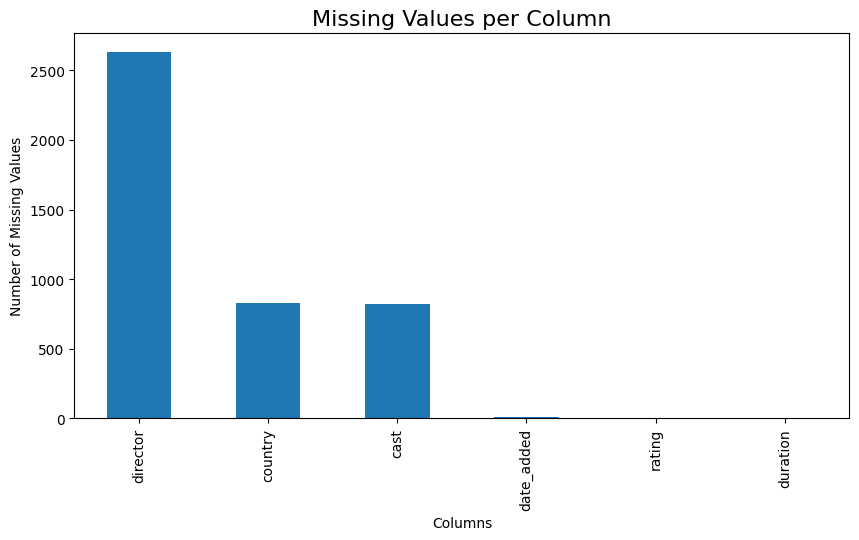

In [10]:
# Plot bar chart for columns with missing values
plt.figure(figsize=(10, 5))
missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar')

plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


---
## 🛠 Step 7 – Handling Missing Values

Missing values can affect our analysis and model performance.
There are different strategies to handle them:

Mean → Good for numerical columns with continuous data.

Median → Useful for numerical data with outliers.

Mode → Best for categorical columns (most frequent value).

Here, we’ll use fillna() to replace missing values.


In [11]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('not available')

---

## 🔍 Step 8 – Check Remaining Missing Values

Before moving forward,  
let’s quickly check **how many missing values** are left in each column.  


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 📅 Step 9 – Extract Year & Month from `date_added`

Our `date_added` column contains both the **month name** and the **year** in a single string.  
Instead of converting it into a datetime object (which might cause issues with inconsistent formats),  
we’ll directly extract:

- **`year_added`** → the last 4 characters of the string (representing the year)  
- **`month_added`** → the first word of the string (representing the month name)
---
✅ Why this method?
Works even if the date format varies slightly

Avoids unnecessary parsing overhead

Keeps the dataset clean for grouping and visualization in the next steps



In [13]:

df['year_added'] = df['date_added'].str.strip().str[-4:]


df['month_added'] = df['date_added'].str.strip().str.split(' ').str[0]

df[['date_added', 'year_added', 'month_added']].head()


,date_added,year_added,month_added
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


## 🌍 Step X – Cleaning & Grouping by Country

To analyze **where Netflix content is produced**, we need to group our data by country.  
However, the `country` column has some challenges:
- Some rows contain **multiple countries** separated by commas.
- Some cells have **missing values**.
- Some country names have **extra spaces**.


In [16]:
# --- Clean and group by Country ---


# Split countries by comma and explode into separate rows
df_countries = df.assign(country=df['country'].str.split(',')).explode('country')

# Remove extra spaces
df_countries['country'] = df_countries['country'].str.strip()

# Group by country and count number of titles
country_counts = df_countries.groupby('country').size().reset_index(name='count')

# Sort by count in descending order
country_counts = country_counts.sort_values(by='count', ascending=False)

# Show top 10 countries
country_counts.head(15)


,country,count
116,United States,4521
46,India,1046
115,United Kingdom,806
21,Canada,445
37,France,393
54,Japan,318
103,Spain,232
101,South Korea,231
39,Germany,226
68,Mexico,169


## 🌍 Grouping by Country & Type (Movies vs TV Shows)
So far, we’ve looked at the top countries producing Netflix content.
But let’s go one step further 👉 and check how many Movies vs TV Shows each country contributes.

We’ll use groupby() on both country and type columns to count titles by category.
✅ This gives us a clear picture of which countries produce more Movies vs TV Shows on Netflix.

In [17]:
country_type_counts = (
    df_countries.groupby(['country', 'type'])
                .size()
                .reset_index(name='count')
)

country_type_counts = country_type_counts.sort_values(by='count', ascending=False)

country_type_counts.head(15)


,country,type,count
174,United States,Movie,3192
175,United States,TV Show,1329
67,India,Movie,962
172,United Kingdom,Movie,534
27,Canada,Movie,319
52,France,Movie,303
173,United Kingdom,TV Show,272
81,Japan,TV Show,199
55,Germany,Movie,182
151,Spain,Movie,171


# 🎭 Step 11 – Analyzing Netflix Genres

Genres (or categories) tell us **what kind of content dominates Netflix** –  
whether it’s *Drama*, *Comedy*, *Documentaries*, or *Action-packed Adventures*.  

Since each title can belong to **multiple genres**,  
we’ll split them into separate rows and then count how many times each appears.  



In [18]:
df_genres = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')

df_genres['genre'] = df_genres['genre'].str.strip()

genre_counts = df_genres.groupby('genre').size().reset_index(name='count')

genre_counts = genre_counts.sort_values(by='count', ascending=False)

genre_counts.head(15)


,genre,count
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


# 📊 Step 12 – Visualizing Genres, Countries & Content Types

Now that we’ve grouped our data by **genre**, **country**, and **content type (Movie/TV Show)**,  
let’s bring the insights to life with **visualizations** 🎨.  

We’ll create **three side-by-side plots** to better understand Netflix’s content distribution:

---

## 1️⃣ Top 15 Genres  
Which types of shows/movies dominate Netflix?  

## 2️⃣ Top 15 Countries  
Which countries produce the most Netflix content?  

## 3️⃣ Movies vs TV Shows in Top Countries  
Within the top-producing countries, do they make more **Movies 🎬** or **TV Shows 📺**?  

C:\Users\arshi\AppData\Local\Temp\ipykernel_24240\4156142498.py:32: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\arshi\AppData\Local\Temp\ipykernel_24240\4156142498.py:32: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\arshi\AppData\Local\Temp\ipykernel_24240\4156142498.py:32: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\arshi\AppData\Local\Temp\ipykernel_24240\4156142498.py:32: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (

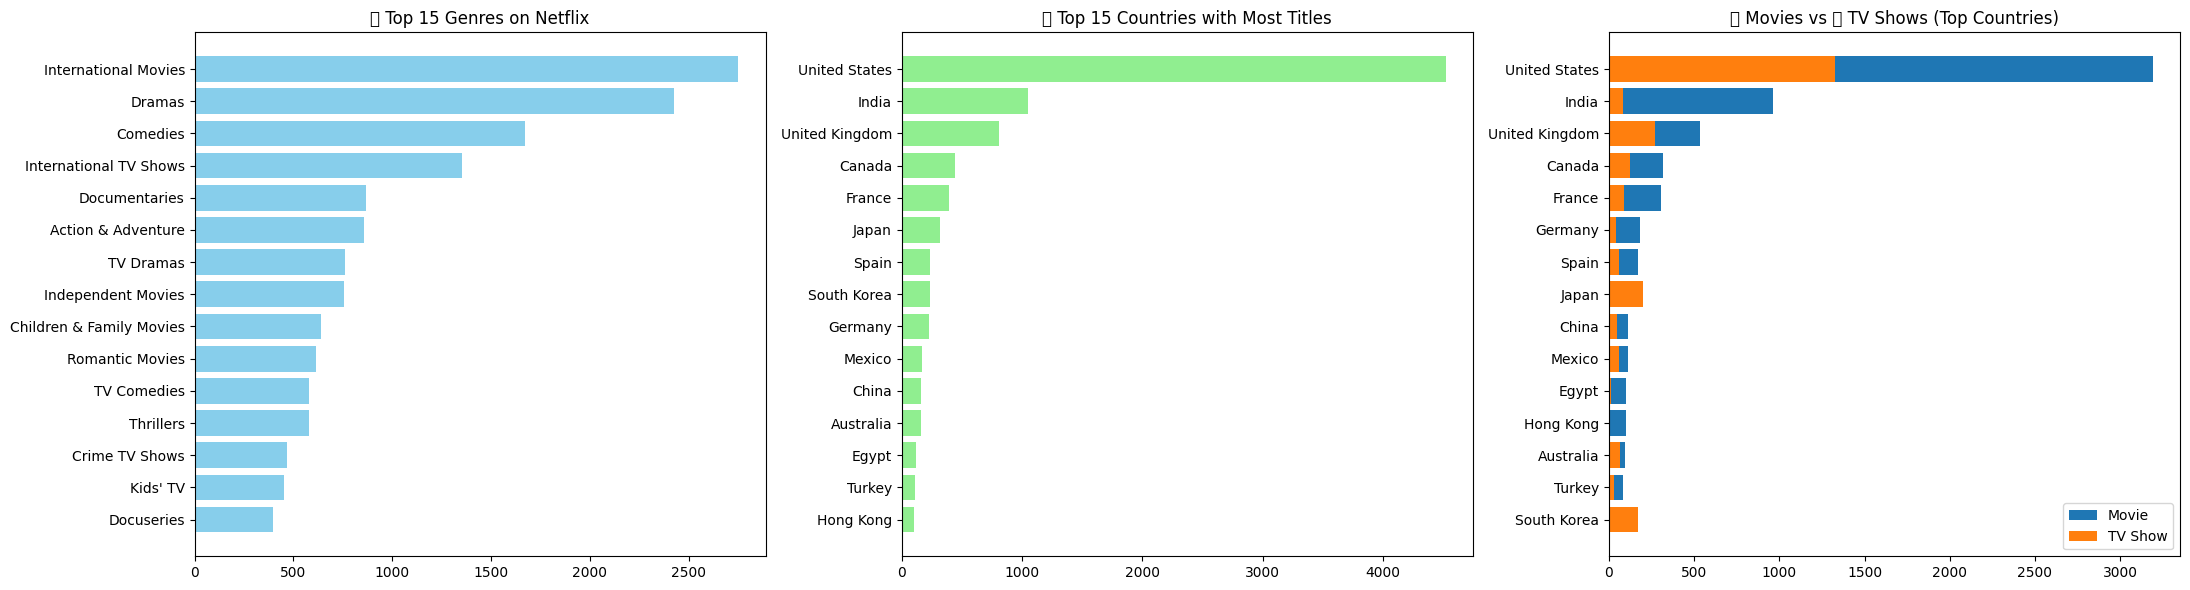

In [19]:
import matplotlib.pyplot as plt

# --- Top 10 Genres ---
top_genres = genre_counts.head(15)

# --- Top 10 Countries ---
top_countries = country_counts.head(15)

# --- Top 5 Countries with Movie/TV Breakdown ---
top5_countries = country_type_counts[country_type_counts['country'].isin(top_countries['country'])]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Plot 1: Top Genres
axes[0].barh(top_genres['genre'], top_genres['count'], color='skyblue')
axes[0].set_title("🎭 Top 15 Genres on Netflix")
axes[0].invert_yaxis()  # biggest on top

# Plot 2: Top Countries
axes[1].barh(top_countries['country'], top_countries['count'], color='lightgreen')
axes[1].set_title("🌍 Top 15 Countries with Most Titles")
axes[1].invert_yaxis()

# Plot 3: Movies vs TV Shows in Top Countries
for label, df_sub in top5_countries.groupby('type'):
    axes[2].barh(df_sub['country'], df_sub['count'], label=label)
axes[2].set_title("🎬 Movies vs 📺 TV Shows (Top Countries)")
axes[2].invert_yaxis()
axes[2].legend()

plt.tight_layout()
plt.show()


# 📊 Insights & Key Findings

After exploring the Netflix dataset through grouping and visualization,  
we can now draw some important insights from the data:

---

### 🌍 Country-Level Insights
- *United States* dominates Netflix’s library with *4,500+ titles*, far more than any other country.  
- *India* (1,000+ titles) and *United Kingdom* (800+ titles) are the next major contributors.  
- Other significant contributors include *Canada, France, Japan, and South Korea*, but with far fewer titles compared to the U.S.  

📌 *Conclusion*: Netflix relies heavily on U.S. productions but still invests in international markets, especially India and the U.K.  

---

### 🎬 Movies vs. TV Shows
- Movies are far more common than TV shows on Netflix.  
- For example, in the U.S. alone, there are *3,192 movies vs. 1,329 TV shows*.  
- This ratio is consistent across most countries.  

📌 *Conclusion*: Netflix’s strategy leans toward short-form content (movies), while TV shows play a secondary but important role.  

---

### 🎭 Genre Distribution
- *International Movies* (2,752 titles) and *Dramas* (2,427 titles) are the top genres.  
- Other popular genres include *Comedies (1,674), **International TV Shows (1,351), and **Documentaries (869)*.  
- Niche genres like *Kids' TV* and *Docuseries* are present but significantly smaller in scale.  

📌 *Conclusion: Netflix prioritizes **international appeal* and *story-driven content* (dramas, comedies, documentaries).  

---

## 🚀 What’s Next?
Now that we’ve identified the *global trends (countries, genres, content type)*,  
👉 in the *next stage* we will dig deeper into *temporal trends*:  
- How has the *number of releases changed over the years*?  
- Are there any spikes in certain years or months?  
- Does Netflix release more content at specific times of the year?

This temporal analysis will help us understand *Netflix’s growth strategy over time*.

# 📆 Step 13 – Temporal Analysis of Netflix Releases

Now that we’ve explored countries, genres, and content types,  
it’s time to understand *how Netflix has grown over the years*.  

We will analyze:
- *Release Year*: When the movies and shows were originally released.  
- *Date Added*: When Netflix added them to its library.  

This will show us:
- How Netflix’s catalog evolved over time 📈  
- Whether Netflix accelerated content acquisition/production in recent years 🚀  
- Seasonal or yearly trends in content releases 🎯

c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


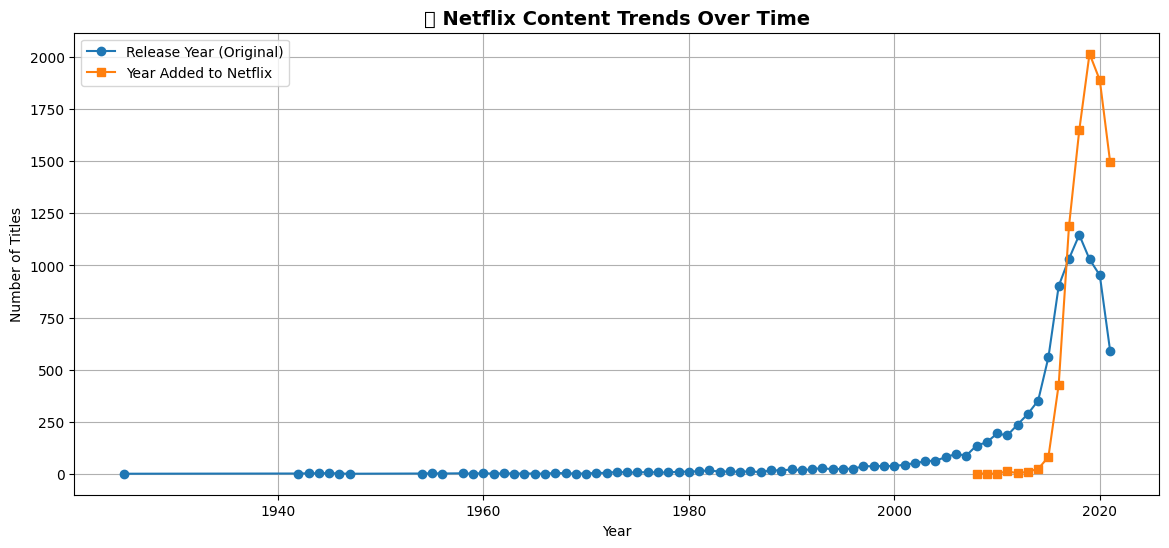

In [21]:

release_trends = df.groupby('release_year').size().reset_index(name='count')

year_added_trends = df.dropna(subset=['year_added']).groupby('year_added').size().reset_index(name='count')
year_added_trends['year_added'] = year_added_trends['year_added'].astype(int)

plt.figure(figsize=(14, 6))

plt.plot(release_trends['release_year'], release_trends['count'], marker='o', label="Release Year (Original)")

plt.plot(year_added_trends['year_added'], year_added_trends['count'], marker='s', label="Year Added to Netflix")

plt.title("📆 Netflix Content Trends Over Time", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 Step 14 – Rating Distribution Analysis

Now that we’ve explored *temporal trends*,  
let’s dive into the *ratings distribution* of Netflix content.  

Ratings (like *TV-MA, TV-14, R, PG*) give us insights into:  
- 📌 *Audience targeting* (kids, teens, adults)  
- 🎬 *Content maturity* levels  
- 🌍 *Regional preferences* based on certification  

This analysis will help us understand *which type of audience Netflix is focusing on* the most.

      rating  count
11     TV-MA   3211
9      TV-14   2160
12     TV-PG    863
8          R    799
7      PG-13    490
14     TV-Y7    334
13      TV-Y    307
6         PG    287
10      TV-G    220
5         NR     80
3          G     41
15  TV-Y7-FV      6
4      NC-17      3
16        UR      3
0     66 min      1


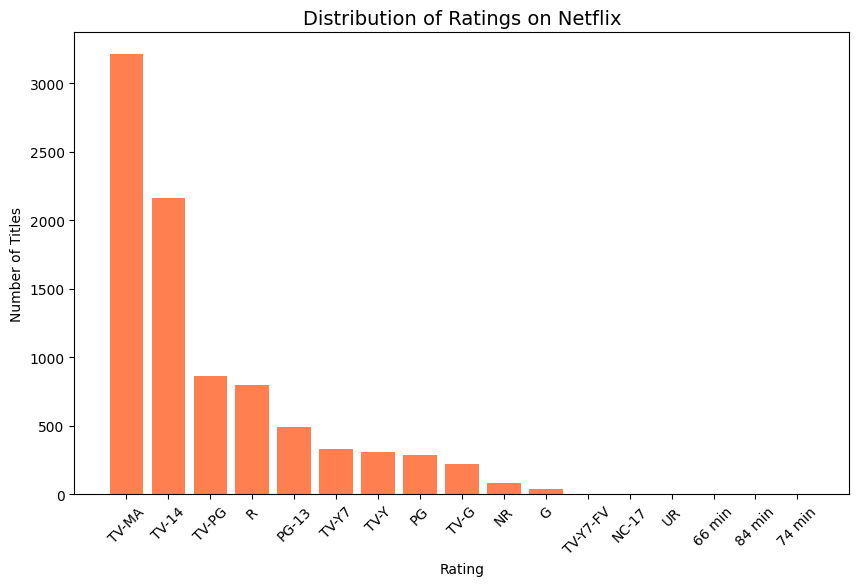

In [22]:
rating_counts = (
    df.groupby('rating')
      .size()
      .reset_index(name='count')
      .sort_values(by='count', ascending=False)
)

print(rating_counts.head(15))

plt.figure(figsize=(10,6))
plt.bar(rating_counts['rating'], rating_counts['count'], color='coral')
plt.title("Distribution of Ratings on Netflix", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# 📊 Final Analysis & Insights on Netflix Dataset  

## 🔹 1. Overview  
This analysis is based on the publicly available Netflix dataset, which includes information about **movies and TV shows** such as title, director, cast, country, release year, date added to Netflix, genres, and ratings.  
The goal of this project was to perform a **comprehensive exploratory data analysis (EDA)** in order to understand the content strategy of Netflix and highlight key trends.  

---

## 🔹 2. Content Trends (Temporal Analysis)  
- There has been an **explosive growth** in the number of titles added to Netflix since **2015**, coinciding with Netflix’s global expansion.  
- The **release year trend** shows that Netflix content is heavily dominated by productions from **2000 onwards**, with the peak around **2018–2020**.  
- This indicates that Netflix is focusing primarily on **modern and recent content**, while only a small portion of its catalog comes from older classics.  

---

## 🔹 3. Country Distribution  
- The **United States** dominates the catalog with **4500+ titles**, followed by **India, the United Kingdom, and Canada**.  
- **France, Japan, Spain, Germany, and South Korea** also contribute significantly, representing Netflix’s international expansion.  
- Countries like **Turkey, Egypt, and Mexico** are emerging markets with growing content production.  
- This reflects Netflix’s strategy of **localizing content** to attract global audiences.  

---

## 🔹 4. Genres  
- The most popular genres on Netflix are:  
  - **International Movies (2750+)**  
  - **Dramas (2400+)**  
  - **Comedies (1600+)**  
  - **Documentaries (860+)**  
- Genres like **Action & Adventure, Romantic Movies, TV Dramas, and Thrillers** also contribute significantly.  
- This mix highlights Netflix’s balance between **mainstream entertainment** (dramas, comedies) and **niche categories** (documentaries, kids’ content, international TV shows).  

---

## 🔹 5. Ratings (Audience Target)  
- The majority of Netflix titles are rated **TV-MA** (Mature Audiences) and **TV-14**, which together account for over **60%** of all content.  
- This confirms Netflix’s focus on **adult and teen audiences**, while content specifically for **kids (TV-Y, TV-G)** is present but limited.  
- The platform seems to prioritize **mature, edgy, and globally appealing content**.  

---

## 🔹 6. Movies vs. TV Shows  
- Netflix hosts significantly more **Movies** than **TV Shows**.  
- However, the number of TV Shows has been **rapidly increasing since 2015**, signaling Netflix’s shift toward **serialized storytelling** (binge-watching model).  
- In countries like the **United States and India**, both categories are strongly represented, but in others (e.g., South Korea, Japan) TV Shows dominate due to cultural preferences.  

---

## 🔹 7. Concluding Insights  
1. **Global Expansion Strategy** – Netflix’s catalog reflects its transition from a U.S.-centric platform to a **global streaming giant**, with strong investments in India, Europe, and Asia.  
2. **Genre Diversity** – A wide variety of genres ensures that Netflix appeals to different audience segments, but **Dramas, Comedies, and International Movies** remain the pillars of its content.  
3. **Focus on Mature Content** – Ratings show a deliberate focus on **teen and adult audiences**, with fewer titles targeting children.  
4. **Shift Toward TV Shows** – While movies dominate in numbers, the **rapid growth of TV shows** highlights Netflix’s future-oriented investment in long-form series.  
5. **Temporal Trends** – Most content is concentrated after 2000, suggesting that Netflix prioritizes **modern productions** over older films.  

---

## 🏁 Final Note  
This analysis highlights Netflix’s **content strategy, audience targeting, and global market expansion**.  
Future work could involve:  
- **Sentiment analysis** on descriptions.  
- **Cast/Director network analysis** to identify top influencers in Netflix content.  
- **Recommendation system modeling** for predicting user preferences.  


# 🔮 Future Work  

While this exploratory data analysis provided valuable insights into Netflix’s catalog, there are several directions to extend the analysis for deeper understanding and practical applications:  

1. **Content Recommendation System**  
   - Build a machine learning model to recommend movies/TV shows to users based on genres, ratings, country, and release year.  

2. **Sentiment Analysis of Descriptions**  
   - Use Natural Language Processing (NLP) to analyze the sentiment of show/movie descriptions and classify content tone (e.g., positive, dark, inspiring).  

3. **Director & Cast Network Analysis**  
   - Create a network graph of collaborations between directors and actors to identify the most influential creators in Netflix’s catalog.  

4. **Temporal Genre Trends**  
   - Explore how the popularity of genres has evolved over time (e.g., growth of documentaries or thrillers after 2015).  

5. **Regional Preferences**  
   - Compare top genres and ratings across different countries to understand localized strategies and cultural preferences.  

6. **Viewer Ratings & Popularity (if data available)**  
   - Incorporate external datasets (e.g., IMDb scores, Rotten Tomatoes) to evaluate whether Netflix focuses more on **quality vs. quantity**.  

---

👉 These extensions will not only enrich the analysis but also provide **real-world applications**, especially in **data-driven decision making** for streaming services.  
